## CSE 6367 Programming Assignment 5 (P5)
## Spring 2024
## Panorama

## Dataset

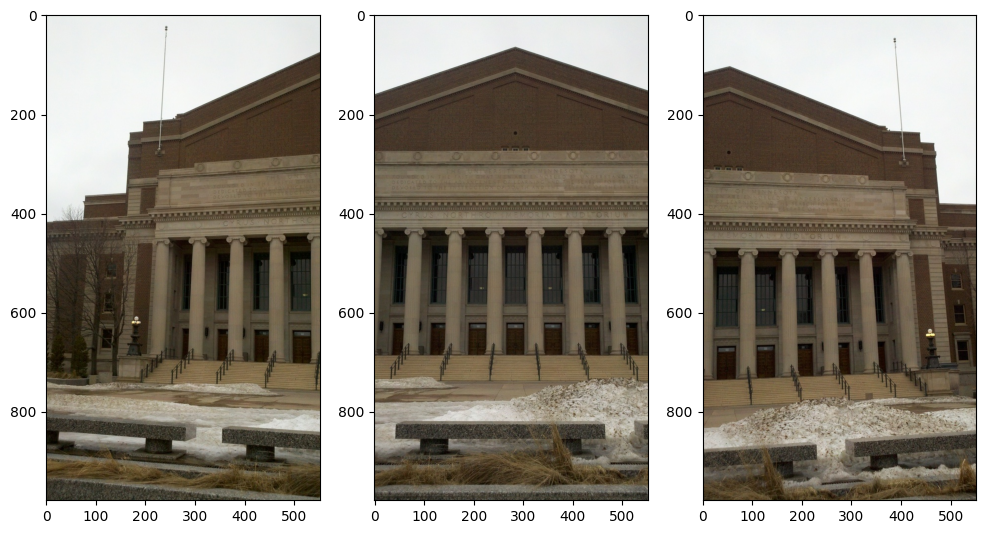

In [7]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("mall1.jpg")
img2 = cv2.imread("mall2.jpg")
img3 = cv2.imread("mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images, you may use library implementation of SIFT/SURF/ORB
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors, you may use library implementation for homography.
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
You should apply the above steps one by one and create the panorama. You shouldn't use opencv Stitcher module to create the panorama directly in 1 line.

In [8]:
#1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images, you may use library implementation of SIFT/SURF/ORB
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detecting keypoints and descriptors of the images
kp1, d1 = sift.detectAndCompute(img1, mask = None)
kp2, d2 = sift.detectAndCompute(img2, mask = None)
kp3, d3 = sift.detectAndCompute(img3, mask = None)

In [9]:
#2. Matching the descriptors between the images
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# Match descriptors between img1 and img2, and img1 and img3
matches12 = bf.match(d1, d2)
matches13 = bf.match(d1, d3)
matches12 = sorted(matches12, key=lambda x: x.distance)
matches13 = sorted(matches13, key=lambda x: x.distance)

In [10]:
#3. Estimate a homography matrix using our matched feature vectors, you may use library implementation for homography.
import numpy as np
def extract_points(matches, kp1, kp2):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt
        points2[i, :] = kp2[match.trainIdx].pt
    return points1, points2

# Extract location of good matches
points12_1, points12_2 = extract_points(matches12, kp1, kp2)
points13_1, points13_2 = extract_points(matches13, kp1, kp3)

# Find homographies
H12, mask12 = cv2.findHomography(points12_1, points12_2, cv2.RANSAC)
H13, mask13 = cv2.findHomography(points13_1, points13_2, cv2.RANSAC)


In [11]:
# Function to extract points from matches
#4. Applying a warping transformation using the homography matrix obtained from Step #3

def extract_points(matches, kp1, kp2):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt
        points2[i, :] = kp2[match.trainIdx].pt
    return points1, points2

# Extract location of good matches
points12_1, points12_2 = extract_points(matches12, kp1, kp2)
points13_1, points13_2 = extract_points(matches13, kp1, kp3)

# Find homographies
H12, mask12 = cv2.findHomography(points12_1, points12_2, cv2.RANSAC)
H13, mask13 = cv2.findHomography(points13_1, points13_2, cv2.RANSAC)

# Warp images
height, width,ch = img2.shape
warped_image_to_2 = cv2.warpPerspective(img1, H12, (width, height))
warped_image_to_3 = cv2.warpPerspective(img1, H13, (width, height))


canvas = np.zeros((height, width * 3, 3), dtype=np.uint8)
canvas[:, width:width*2] = img2
canvas[:, :width] = warped_image_to_2
canvas[:, width*2:width*3] = warped_image_to_3



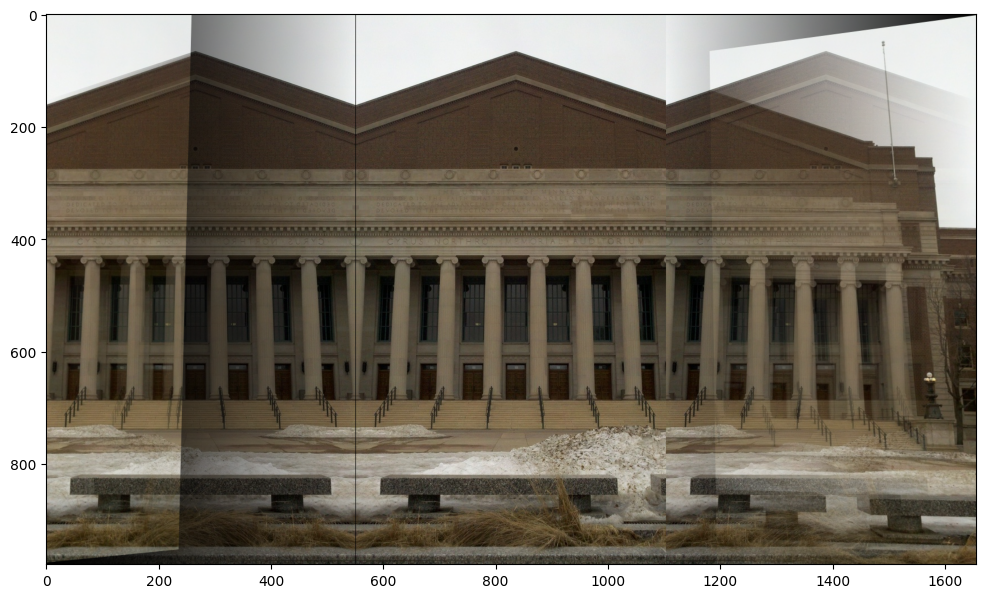

In [12]:

for i in range(width):
    alpha = i / width
    beta = 1 - alpha
    for c in range(ch):
        canvas[:height, width-i-1, c] = (alpha * canvas[:height, width-i-1, c] +
                                         beta * canvas[:height, width+i-1, c]).astype(np.uint8)

    for c in range(ch):
        canvas[:height, 2*width+i, c] = (alpha * canvas[:height, 2*width+i, c] +
                                         beta * canvas[:height, width+i, c]).astype(np.uint8)




mask = np.any(canvas > 0, axis=-1)
coords = np.argwhere(mask)
x0, y0 = coords.min(axis=0)
x1, y1 = coords.max(axis=0) + 1
plt.imshow(canvas[x0:x1, y0:y1])

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file.
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.